In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [29]:
!mkdir main
!wget -P main/ https://raw.githubusercontent.com/nurkhalimah74/sunflowers.github.io/main/bandung.csv
bandung = pd.read_csv('main/bandung.csv')

mkdir: cannot create directory ‘main’: File exists
--2021-04-13 15:04:11--  https://raw.githubusercontent.com/nurkhalimah74/sunflowers.github.io/main/bandung.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92012 (90K) [text/plain]
Saving to: ‘main/bandung.csv.1’

bandung.csv.1       100%[===================>]  89.86K  --.-KB/s    in 0.02s   

2021-04-13 15:04:12 (4.74 MB/s) - ‘main/bandung.csv.1’ saved [92012/92012]



In [30]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-13 15:04:18--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0.002s  

2021-04-13 15:04:18 (9.40 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



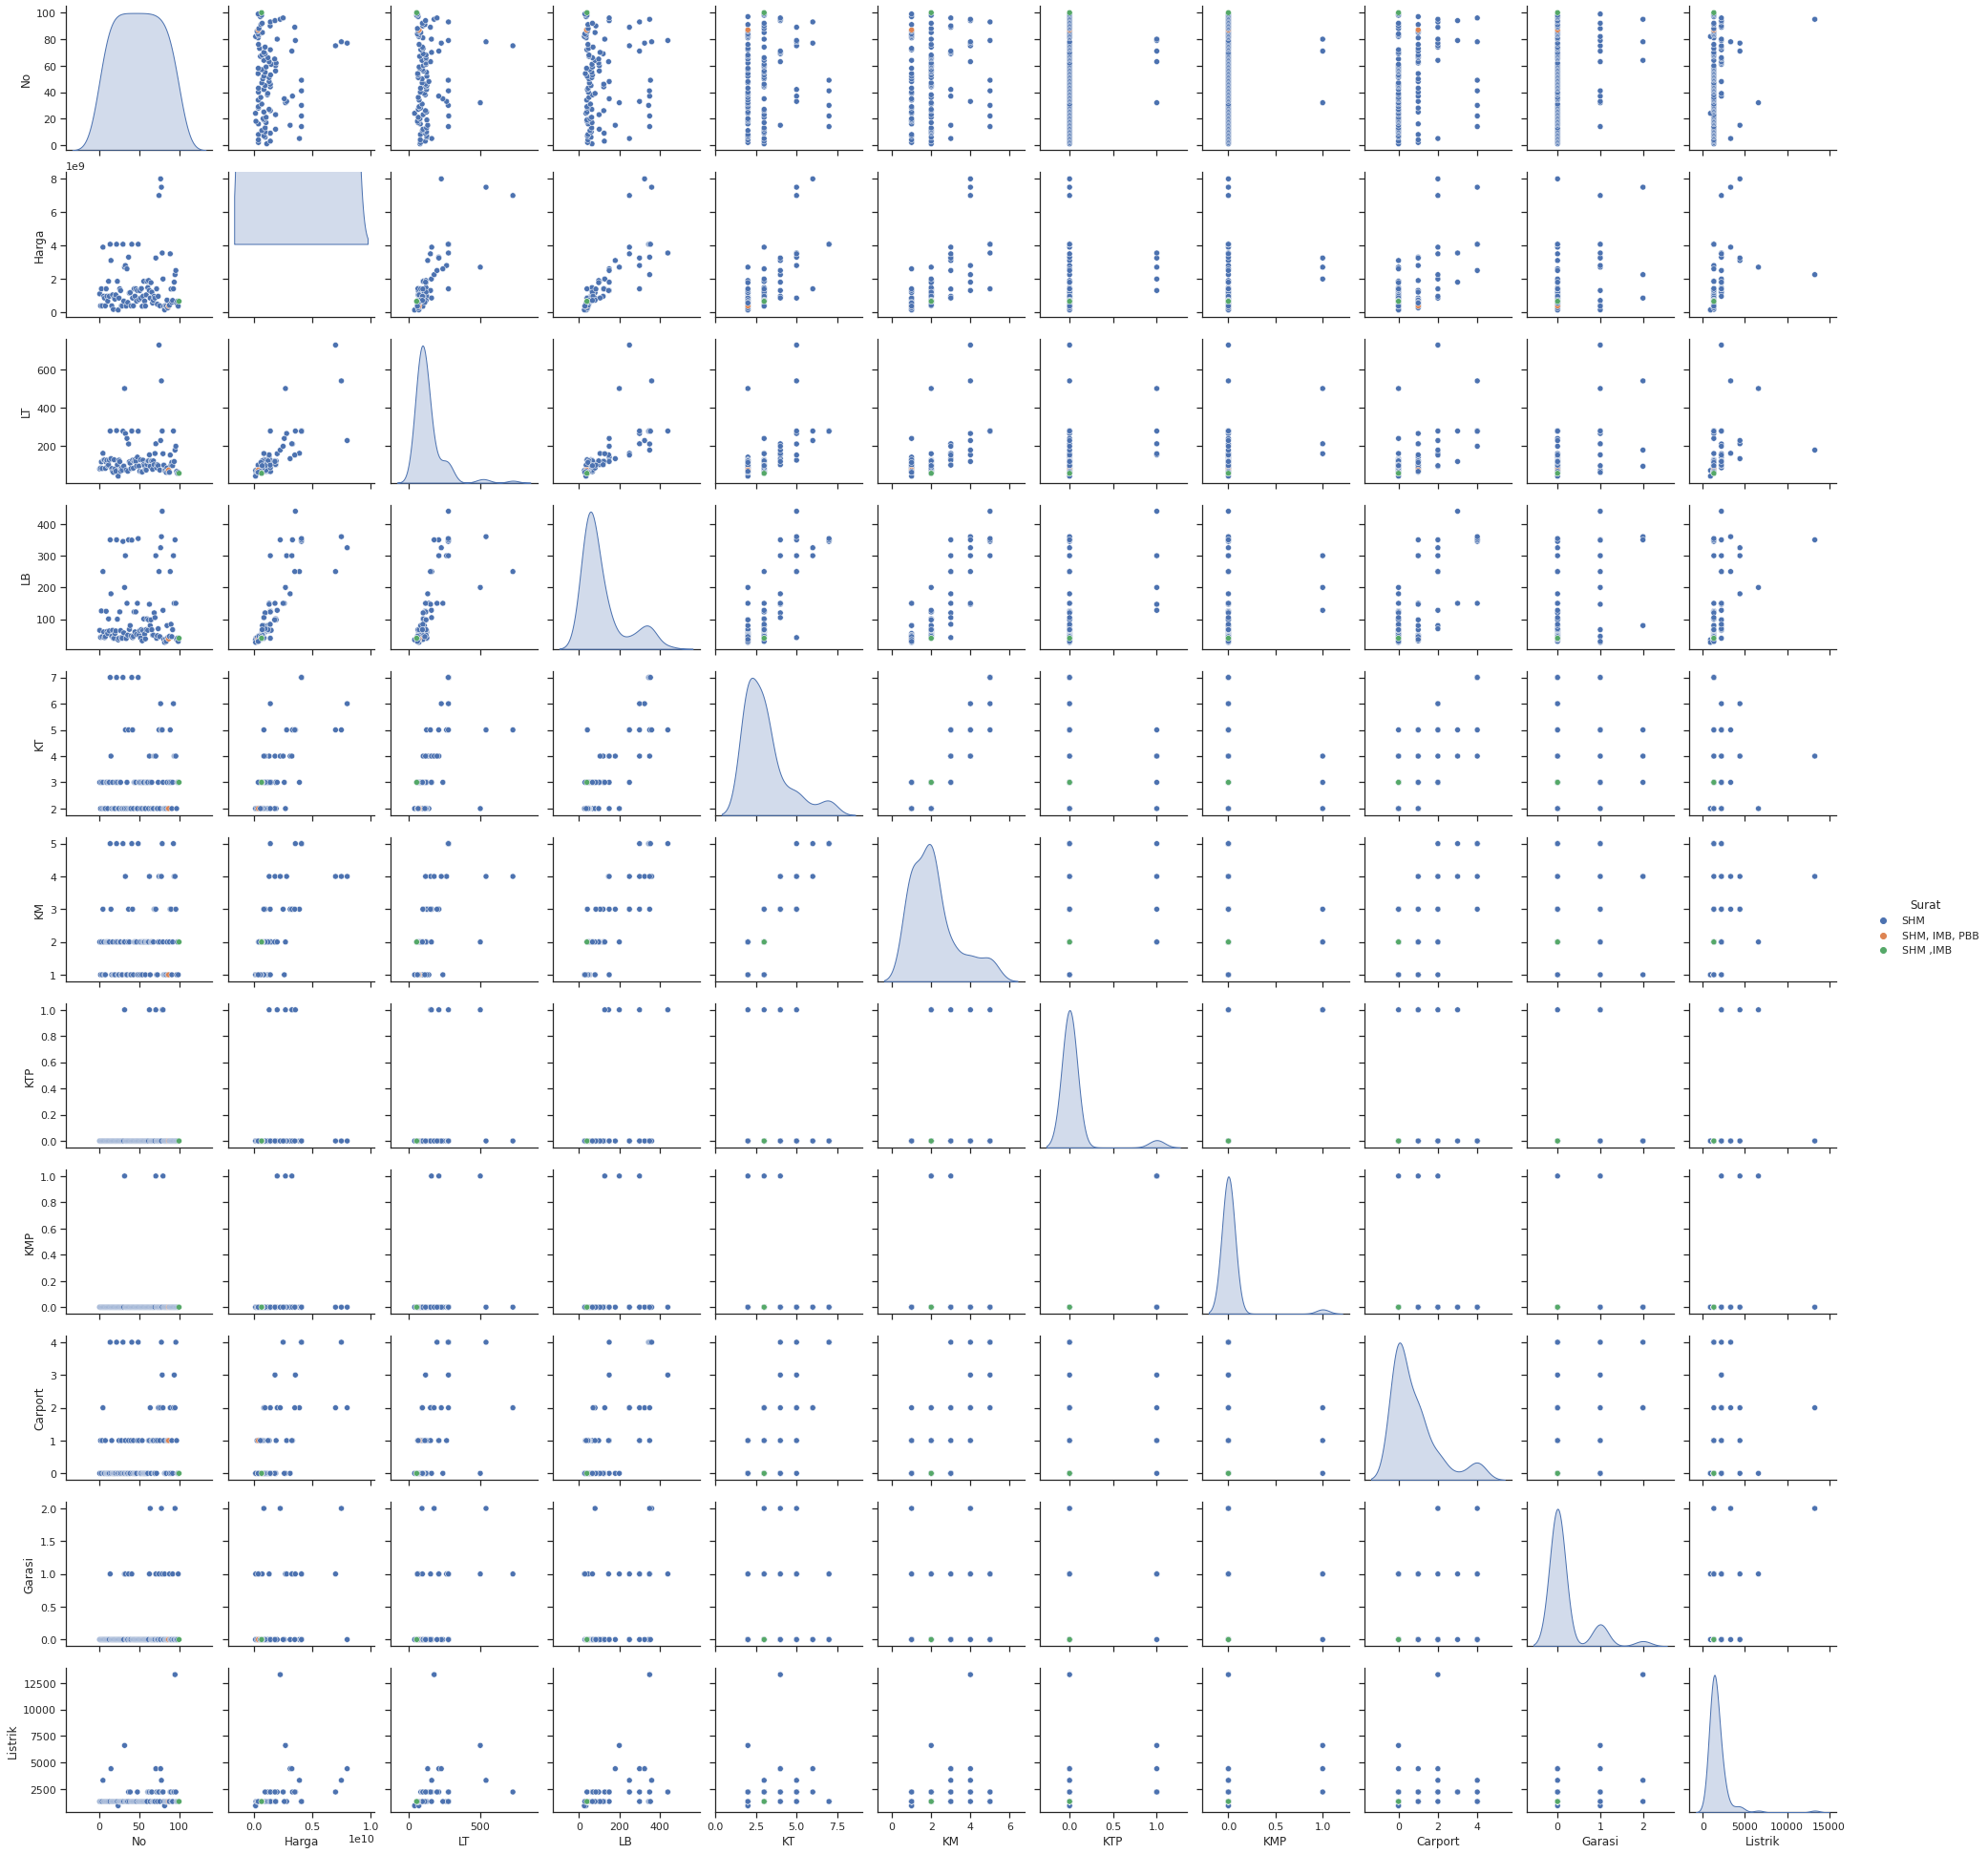

In [31]:
sns.pairplot(bandung,hue='Surat');

In [34]:
bandung.drop(['Tgl_Iklan','URL','Judul','Deskripsi'], axis=1, inplace=True)
bandung.head()

,No,Harga,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Unnamed: 17
0,1,1095000000,Bandung,78,65,3,2,0,0,0,0,1300,SHM,NaN
1,2,379000000,Bandung,82,43,2,1,0,0,1,0,1300,SHM,NaN
2,3,1400000000,Bandung,115,126,3,2,0,0,0,0,1300,SHM,NaN
3,4,379000000,Bandung,80,45,2,1,0,0,1,0,1300,SHM,NaN
4,5,3900000000,Bandung,160,250,3,3,0,0,2,0,3300,SHM,NaN


In [35]:
bandung.iloc[:,:-1]

,No,Harga,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat
0,1,1095000000,Bandung,78,65,3,2,0,0,0,0,1300,SHM
1,2,379000000,Bandung,82,43,2,1,0,0,1,0,1300,SHM
2,3,1400000000,Bandung,115,126,3,2,0,0,0,0,1300,SHM
3,4,379000000,Bandung,80,45,2,1,0,0,1,0,1300,SHM
4,5,3900000000,Bandung,160,250,3,3,0,0,2,0,3300,SHM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2500000000,Bandung,197,150,4,3,0,0,4,0,2200,SHM
96,97,547123456,Bandung,65,36,2,1,0,0,1,0,1300,SHM
97,98,650040000,Bandung,55,40,3,2,0,0,0,0,1300,SHM
98,99,362000000,Bandung,60,30,3,1,0,0,0,1,1300,SHM


In [36]:
c_data = np.array(bandung.iloc[:,:-1])
c_data[:5]

array([[1, 1095000000, 'Bandung', 78, 65, 3, 2, 0, 0, 0, 0, 1300, 'SHM'],
       [2, 379000000, 'Bandung', 82, 43, 2, 1, 0, 0, 1, 0, 1300, 'SHM'],
       [3, 1400000000, 'Bandung', 115, 126, 3, 2, 0, 0, 0, 0, 1300,
        'SHM'],
       [4, 379000000, 'Bandung', 80, 45, 2, 1, 0, 0, 1, 0, 1300, 'SHM'],
       [5, 3900000000, 'Bandung', 160, 250, 3, 3, 0, 0, 2, 0, 3300,
        'SHM']], dtype=object)